# Simple Linear Regression

Objective: Predicting concrete strength  
Dataset: compresive_strength_concrete.csv  
Ref: NA

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

df = pd.read_csv("compresive_strength_concrete.csv")
print('Dataset size: ',df.shape)
df.head()

Dataset size:  (1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [2]:
#Renaming the Columns
df.columns = ['cement', 'furnace_slag', 'flay_ash',   
                'water', 'superplasticizer',  
                'coarse_agg', 'fine_agg', 'age_day',   
                'concrete_strength']
df.head()

,cement,furnace_slag,flay_ash,water,superplasticizer,coarse_agg,fine_agg,age_day,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


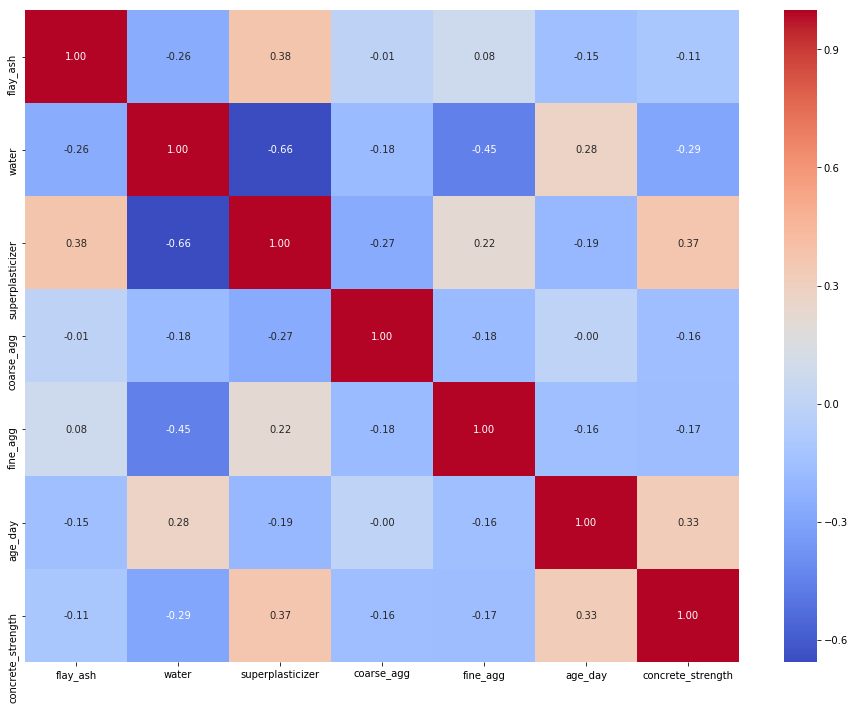

In [3]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [4]:
corr_rank = df.corr()
corr_rank["concrete_strength"].sort_values(ascending=False)

concrete_strength    1.000000
cement               0.497832
superplasticizer     0.366079
age_day              0.328873
furnace_slag         0.134829
flay_ash            -0.105755
coarse_agg          -0.164935
fine_agg            -0.167241
water               -0.289633
Name: concrete_strength, dtype: float64

## Corr Plot 1: concrete_strength vs cement

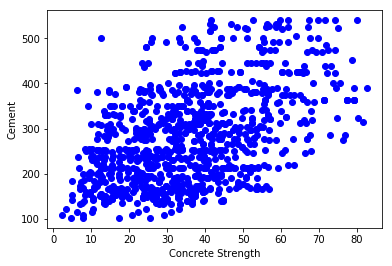

In [5]:
plt.scatter(df.concrete_strength, df.cement, color='blue')
plt.xlabel("Concrete Strength")
plt.ylabel("Cement")
plt.show()

## Corr Plot 2: concrete_strength vs superplasticizer     

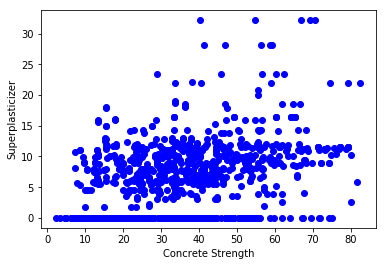

In [6]:
plt.scatter(df.concrete_strength, df.superplasticizer, color='blue')
plt.xlabel("Concrete Strength")
plt.ylabel("Superplasticizer")
plt.show()

## Corr Plot 3: concrete_strength vs age(day)     

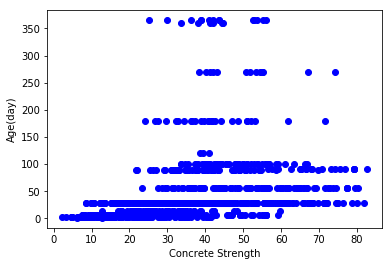

In [7]:
plt.scatter(df.concrete_strength, df.age_day, color='blue')
plt.xlabel("Concrete Strength")
plt.ylabel("Age(day)")
plt.show()

## Split Train Test

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

print(train.shape)
train.head()

(837, 9)


,cement,furnace_slag,flay_ash,water,superplasticizer,coarse_agg,fine_agg,age_day,concrete_strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70


## Modelling 1: concrete_strength vs cement

Coefficient: [[0.07853853]]
Intercept  : [13.78643329]


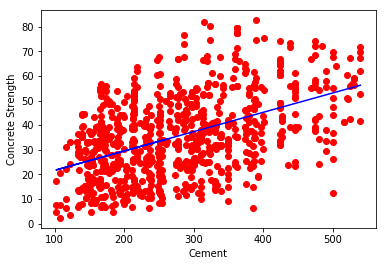

In [9]:
#Using SKlearn Package to model data
from sklearn import linear_model
regr_en = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[['cement']])
train_y1 = np.asanyarray(train[['concrete_strength']])
regr_en.fit(train_x1,train_y1)

print('Coefficient:', regr_en.coef_)
print('Intercept  :', regr_en.intercept_)

#Plot line into Scatter Plot 
plt.scatter(train.cement, train.concrete_strength, color='red')
plt.plot(train_x1, regr_en.coef_[0][0] * train_x1 + regr_en.intercept_[0], '-b')
plt.xlabel("Cement")
plt.ylabel("Concrete Strength")
plt.show()

In [10]:
#Check model accuracy
from sklearn.metrics import r2_score

test_x1 = np.asanyarray(test[['cement']])
test_y1 = np.asanyarray(test[['concrete_strength']])
test_y1_ = regr_en.predict(test_x1)

en_mae = np.mean(np.absolute(test_y1_ - test_y1))
en_mse = np.mean((test_y1_ - test_y1)**2)
en_r2 = r2_score(test_y1_ , test_y1)

print("Mean absolure error          : %.2f" % en_mae)
print("Residual sum of squares (MSE): %.2f" % en_mse)
print("R2-Score                     : %.2f" % en_r2)

Mean absolure error          : 11.49
Residual sum of squares (MSE): 202.55
R2-Score                     : -1.69


In [11]:
#Using Model 1 for prediction
new_cement = 266

pred_en = regr_en.predict([[new_cement]])
print("Using CementComponent    : %.2f" % (new_cement))
print("Predicted Cement Strength: %.2f" % (pred_en))

Using CementComponent    : 266.00
Predicted Cement Strength: 34.68


## Conclusion

Even using the highest correlation, we found out the result is not convincing enough to further investigation. Final conclusion, Linear Regression is not suitable for predicting this dataset.